In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [87]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=2500, n_features=2, centers=6)

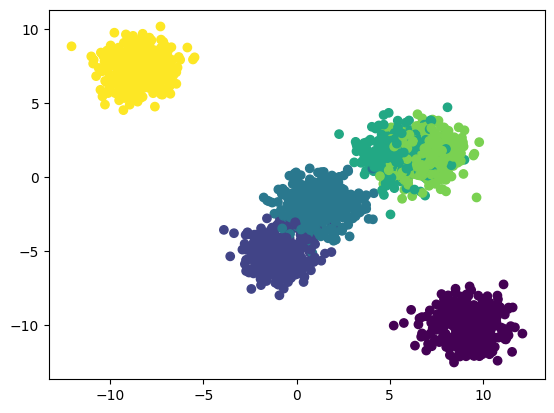

In [88]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

In [89]:
print(X[:,:1].shape[0], "", X[:,:4].shape, "", X.shape)

2500  (2500, 2)  (2500, 2)


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [91]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares
CLUSTER_SZ = 10
for k in range(1,CLUSTER_SZ):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_std)
    wcss.append(kmeans.inertia_)

In [92]:
wcss

[4000.0000000000036,
 1763.4636528218334,
 959.0114599290046,
 197.48600292987481,
 120.55455370897478,
 113.7097572946911,
 95.61173406660453,
 90.5936694902247,
 82.8882144017058]

KneeLocator found optimum k value is  4


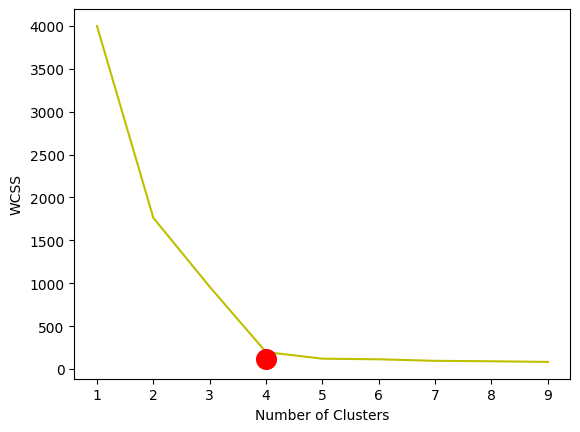

In [110]:
plt.plot(range(1,CLUSTER_SZ),wcss, c='y')
plt.xticks(range(1,CLUSTER_SZ))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

from kneed import KneeLocator
k_val = KneeLocator(x=range(1,CLUSTER_SZ), y=wcss, S=1.0, curve='convex', direction='decreasing')
opti_kval = int(k_val.elbow)
print("KneeLocator found optimum k value is ", opti_kval)
plt.scatter(opti_kval, wcss[opti_kval], color='red', s=200, zorder=5)
plt.show()

In [94]:
from kneed import KneeLocator
k_val = KneeLocator(x=range(1,CLUSTER_SZ), y=wcss, S=1.0, curve='convex', direction='decreasing')
int(k_val.elbow)

4

KMeans Interia is  197.4873953969753
KMeans Label is  [2 2 0 ... 0 2 0]   <class 'numpy.ndarray'>


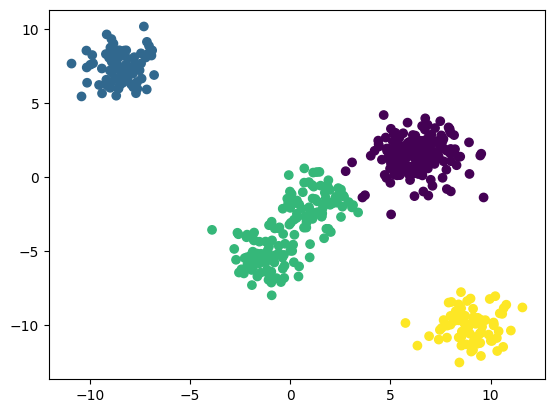

In [97]:
# Based on above graph, it is going to flat at k=4

kmeans=KMeans(n_clusters=int(k_val.elbow),init="k-means++")
kmeans.fit_predict(X_train_std)
print("KMeans Interia is ",kmeans.inertia_)
print("KMeans Label is ",kmeans.labels_," ", type(kmeans.labels_))
y_pred=kmeans.predict(X_test_std)
plt.scatter(x=X_test[:,0], y= X_test[:,1], c=y_pred)

In [101]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouette_coefficients=[]
for k in range(2, CLUSTER_SZ):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_std)
    score=silhouette_score(X_train_std,kmeans.labels_)
    silhouette_coefficients.append(score)
silhouette_coefficients

[0.6215114294089737,
 0.5499664135754638,
 0.7377757924560497,
 0.7015003663189453,
 0.5919748821008264,
 0.4927047838768701,
 0.44948007349157476,
 0.4121951276775257]

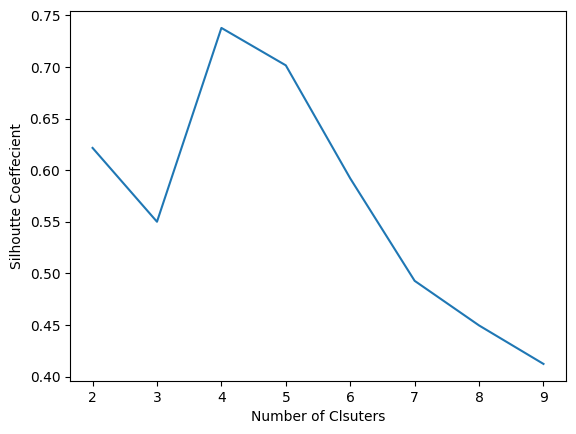

In [103]:
plt.plot(range(2,CLUSTER_SZ),silhouette_coefficients)
plt.xticks(range(2,CLUSTER_SZ))
plt.xlabel("Number of Clsuters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

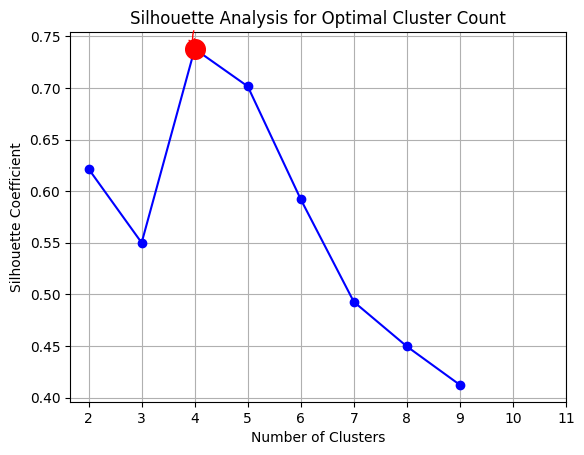

In [107]:
# --- Main Plotting Code ---
plt.plot(range(2, CLUSTER_SZ), silhouette_coefficients, marker='o', linestyle='-', color='b')

# --- Highlight the Highest Point ---
# 1. Find the index of the highest coefficient
optimal_index = np.argmax(silhouette_coefficients)

# 2. Get the x and y coordinates of the highest point
optimal_clusters = range(2, CLUSTER_SZ)[optimal_index]
max_coefficient = silhouette_coefficients[optimal_index]

# 3. Plot a new, distinct scatter point at the optimal location
plt.scatter(optimal_clusters, max_coefficient, color='red', s=200, zorder=5)

# 4. Add a text annotation to label the point
plt.annotate(
    f'',
    (optimal_clusters, max_coefficient),
    textcoords="offset points",
    xytext=(0,15),
    ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='red')
)

# --- Plot Formatting ---
plt.xticks(range(2, CLUSTER_SZ + 2))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Analysis for Optimal Cluster Count")
plt.grid(True)

plt.show()
